In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ruta = "C:/1_IXORIGUE/1_Proyectos/0_K8S/data/processed/consulta_01_2025-07-09_21-30_v01.csv"
df = pd.read_csv(ruta)
print(f"🔢 Registros cargados: {len(df)}")
df.head()


🔢 Registros cargados: 7813


,device_id,SerialNumber,Model,mensajes_esperados,mensajes_recibidos,mensajes_sin_gps,pct_recibidos_vs_esperados,pct_sin_gps_vs_esperados,pct_sin_gps_recibidos,ultimo_mensaje_recibido,ultima_posicion_gps_valida,visto_ultima_vez,numero_reinicios,media_ttf,porcentaje_bateria,fecha_cambio_bateria,suma_total_uplinks,ranch_name,customer_name,animal_name,tiempo_desde_ultimo_mensaje,tiempo_desde_ultima_posicion_gps,tiempo_inactivo,clasificacion_gps,clasificacion_conexion
0,814137ec-10d7-49e4-ad0c-ed5369c279ee,70001993,ixo_track,36,0,0,0.0,0.0,NaN,2025-06-02 00:00:00.000000,2024-04-02 09:45:00,2025-06-02 11:09:40.908379,1,60.00,0.30,2023-03-14,14031,José Manuel Gutiérrez,José Manuel Gutiérrez,5649,909.511969,11123.761969,898.350605,GPS >3 meses,Conexión 1-3 meses
1,f829e62e-04a5-41a4-a7a3-429591b25171,80002127,cow_pro,36,0,0,0.0,0.0,NaN,2025-05-27 05:44:46.359150,NaN,2025-05-27 05:49:28.282772,0,60.00,0.98,2025-05-23,4,Josep corts - casa nasi,Josep corts - casa nasi,80002127,1047.765758,NaN,1047.687446,Sin posición GPS válida,Conexión 1-3 meses
2,38d8ee4d-67b6-49f2-8d75-9dff2b1ff2d3,70004842,ixo_track,36,0,0,0.0,0.0,NaN,2025-02-27 17:00:00.000000,2025-02-27 17:00:00,2025-03-10 10:11:43.187342,44,48.54,0.46,2023-12-21,13711,José López Arnejo,José López Arnejo,Rubiacabada,3172.511969,3172.511969,2915.316639,GPS >3 meses,Conexión >3 meses
3,55a0113b-c55e-445d-8eef-8d79f498c15d,70013141,ixo_track,36,0,0,0.0,0.0,NaN,2025-07-05 21:01:00.000000,2025-07-05 21:01:00,2025-07-05 21:01:55.988266,0,47.14,0.91,2025-04-24,572,Manuel Pérez Martínez,Manuel Pérez Martínez,0183,96.495302,96.495302,96.479750,GPS 3-7 días,Conexión 3-7 días
4,86729d7e-599a-4da2-b10f-76c131681a64,70007663,ixo_track,36,0,0,0.0,0.0,NaN,2024-11-28 03:00:00.000000,2024-11-28 03:00:00,2024-11-28 03:01:47.946615,0,NaN,NaN,2024-05-29,554,Óscar Puente Cabrerizo,Óscar Puente Cabrerizo,1815,5370.511969,5370.511969,5370.481984,GPS >3 meses,Conexión >3 meses


In [3]:
# Asegurar campos numéricos y sin NaNs
df["mensajes_esperados"] = df["mensajes_esperados"].fillna(0)
df["mensajes_recibidos"] = df["mensajes_recibidos"].fillna(0)

# Cálculo ratio recibido / esperado
df["pct_recibidos_vs_esperados"] = (
    df["mensajes_recibidos"] / df["mensajes_esperados"]
).round(4)

# Filtrar solo los que tienen al menos 1 mensaje esperado
df = df[df["mensajes_esperados"] > 0]


In [4]:
def clasificar_tramo(ratio):
    if pd.isna(ratio):
        return "Desconocido"
    elif ratio == 0:
        return "=0%"
    elif 0 < ratio < 0.2:
        return "<20%"
    elif ratio < 0.4:
        return "20–40%"
    elif ratio < 0.6:
        return "40–60%"
    elif ratio < 0.8:
        return "60–80%"
    elif ratio <= 1.0:
        return "80–100%"
    else:
        return ">100%"

df_guadiamar["tramo_ratio_detallado"] = df_guadiamar["pct_recibidos_vs_esperados"].apply(clasificar_tramo)
orden_tramos = ["=0%", "<20%", "20–40%", "40–60%", "60–80%", "80–100%", ">100%"]
guadiamar_tramos = df_guadiamar["tramo_ratio_detallado"].value_counts().reindex(orden_tramos).fillna(0)


NameError: name 'df_guadiamar' is not defined

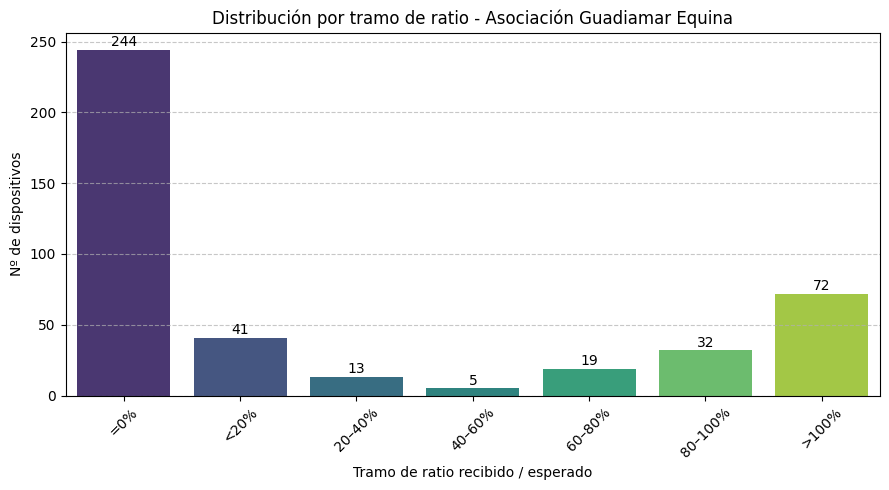

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
ax = sns.barplot(
    x=guadiamar_tramos.index,
    y=guadiamar_tramos.values,
    palette="viridis"
)

# Etiquetas en barras
for i, v in enumerate(guadiamar_tramos.values):
    ax.text(i, v + 0.5, str(int(v)), ha='center', va='bottom', fontsize=10)

plt.title("Distribución por tramo de ratio - Asociación Guadiamar Equina")
plt.ylabel("Nº de dispositivos")
plt.xlabel("Tramo de ratio recibido / esperado")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


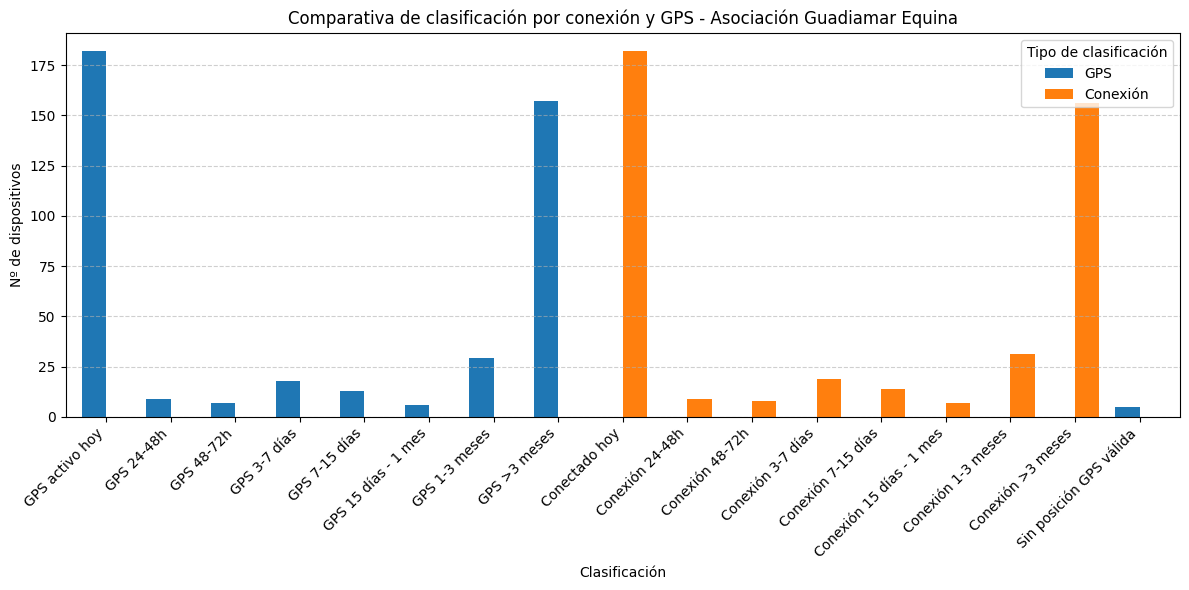

In [23]:
df_guadiamar = df[df["customer_name"] == "Asociación Guadiamar Equina"].copy()
# Cuenta por clasificación GPS
gps_counts = df_guadiamar["clasificacion_gps"].value_counts()

# Cuenta por clasificación de conexión general
conexion_counts = df_guadiamar["clasificacion_conexion"].value_counts()

# Combinar ambas en un DataFrame
comparativa = pd.DataFrame({
    "GPS": gps_counts,
    "Conexión": conexion_counts
}).fillna(0)

# Orden lógico personalizado si lo necesitas
orden = [
    "GPS activo hoy", "GPS 24-48h", "GPS 48-72h", "GPS 3-7 días", "GPS 7-15 días",
    "GPS 15 días - 1 mes", "GPS 1-3 meses", "GPS >3 meses",
    "Conectado hoy", "Conexión 24-48h", "Conexión 48-72h", "Conexión 3-7 días",
    "Conexión 7-15 días", "Conexión 15 días - 1 mes", "Conexión 1-3 meses", "Conexión >3 meses",
    "Sin posición GPS válida"
]
comparativa = comparativa.reindex(orden).dropna(how='all')



import matplotlib.pyplot as plt

comparativa = comparativa.dropna(how='all')  # Por si hay filas vacías

comparativa.plot(
    kind='bar',
    figsize=(12, 6),
    width=0.75,
    color=["#1f77b4", "#ff7f0e"]
)

plt.title("Comparativa de clasificación por conexión y GPS - Asociación Guadiamar Equina")
plt.xlabel("Clasificación")
plt.ylabel("Nº de dispositivos")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tipo de clasificación")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


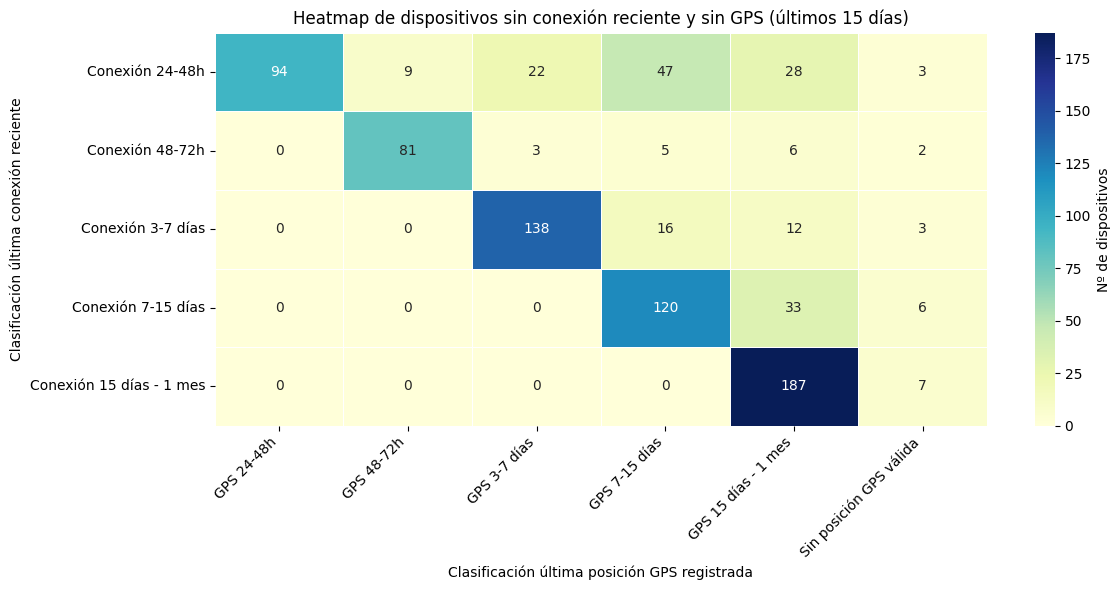

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar categorías a excluir
excluir_conexion = ["Conectado hoy", "Conexión 1-3 meses", "Conexión >3 meses"]
excluir_gps = ["GPS activo hoy", "GPS 1-3 meses", "GPS >3 meses"]

# Filtrar DataFrame
df_filtrado = df[
    ~df["clasificacion_conexion"].isin(excluir_conexion) &
    ~df["clasificacion_gps"].isin(excluir_gps)
]

# Crear tabla cruzada
tabla_heatmap = pd.crosstab(
    df_filtrado["clasificacion_conexion"],
    df_filtrado["clasificacion_gps"]
)

# Reordenar índices y columnas deseadas
orden_conexion = [
    "Conexión 24-48h", "Conexión 48-72h",
    "Conexión 3-7 días", "Conexión 7-15 días",
    "Conexión 15 días - 1 mes"
]

orden_gps = [
    "GPS 24-48h", "GPS 48-72h",
    "GPS 3-7 días", "GPS 7-15 días",
    "GPS 15 días - 1 mes", "Sin posición GPS válida"
]

tabla_heatmap = tabla_heatmap.reindex(index=orden_conexion, columns=orden_gps, fill_value=0)

# Plot del heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    tabla_heatmap,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Nº de dispositivos"}
)

plt.title("Heatmap de dispositivos sin conexión reciente y sin GPS (últimos 15 días)")
plt.xlabel("Clasificación última posición GPS registrada")
plt.ylabel("Clasificación última conexión reciente")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


<positron-console-cell-36>:39: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
C:\Users\usuario\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


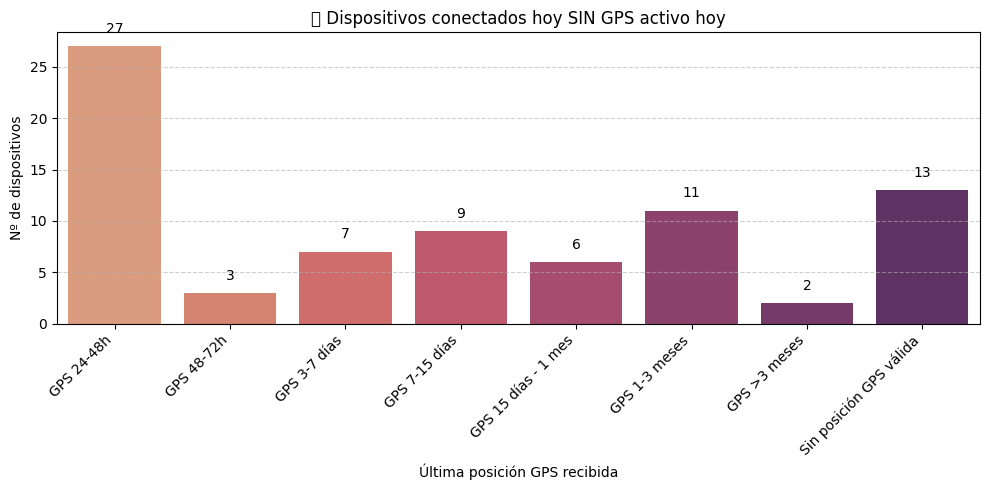

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo dispositivos conectados hoy que NO tienen GPS activo hoy
df_conectados_sin_gps_hoy = df[
    (df["clasificacion_conexion"] == "Conectado hoy") &
    (df["clasificacion_gps"] != "GPS activo hoy")
].copy()

# Orden deseado de categorías
orden_gps = [
    "GPS 24-48h",
    "GPS 48-72h",
    "GPS 3-7 días",
    "GPS 7-15 días",
    "GPS 15 días - 1 mes",
    "GPS 1-3 meses",
    "GPS >3 meses",
    "Sin posición GPS válida"
]

# Conteo por clasificación GPS
conteo_gps = df_conectados_sin_gps_hoy["clasificacion_gps"].value_counts().reindex(orden_gps, fill_value=0)

# Gráfico
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=conteo_gps.index, y=conteo_gps.values, palette="flare")

# Añadir etiquetas encima de las barras
for i, v in enumerate(conteo_gps.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.title("🔍 Dispositivos conectados hoy SIN GPS activo hoy")
plt.xlabel("Última posición GPS recibida")
plt.ylabel("Nº de dispositivos")
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<positron-console-cell-39>:40: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
C:\Users\usuario\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


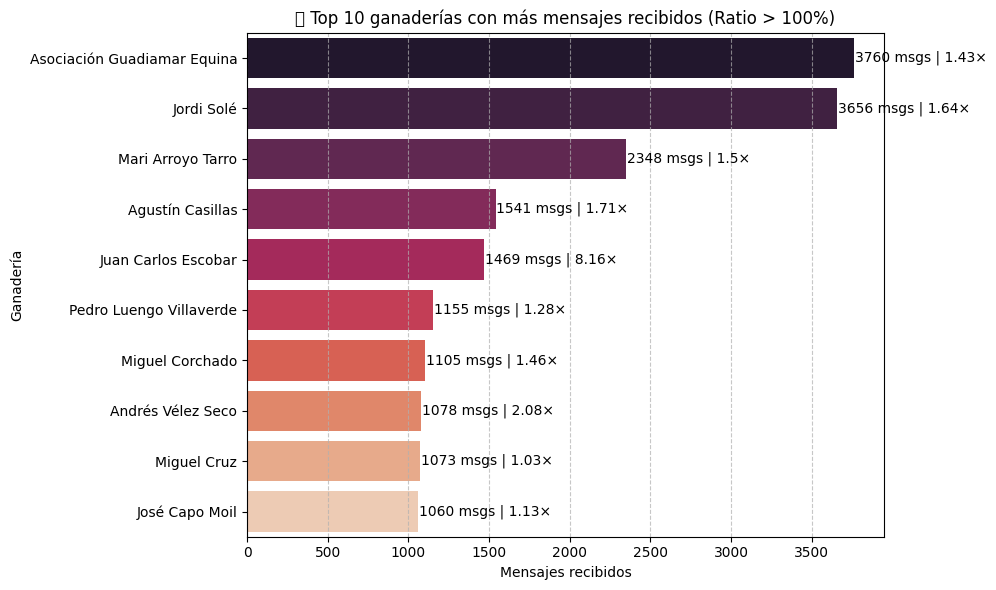

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo dispositivos con ratio > 100%
df_ratio_alto = df[df["pct_recibidos_vs_esperados"] > 1.0].copy()

# Agrupar por ganadería (ranch_name) y sumar mensajes
top_ranch = (
    df_ratio_alto
    .groupby("ranch_name")
    .agg(
        mensajes_recibidos=("mensajes_recibidos", "sum"),
        dispositivos=("device_id", "nunique"),
        ratio_medio=("pct_recibidos_vs_esperados", "mean")
    )
    .sort_values("mensajes_recibidos", ascending=False)
    .head(10)
)

# Redondear el ratio medio
top_ranch["ratio_medio"] = top_ranch["ratio_medio"].round(2)

# Crear la gráfica
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    y=top_ranch.index,
    x=top_ranch["mensajes_recibidos"],
    palette="rocket"
)

# Añadir etiquetas con ratio en cada barra
for i, (mensajes, ratio) in enumerate(zip(top_ranch["mensajes_recibidos"], top_ranch["ratio_medio"])):
    ax.text(mensajes + 5, i, f"{mensajes} msgs | {ratio}×", va='center', fontsize=10)

plt.title("📈 Top 10 ganaderías con más mensajes recibidos (Ratio > 100%)")
plt.xlabel("Mensajes recibidos")
plt.ylabel("Ganadería")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<positron-console-cell-5>:52: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
C:\1_IXORIGUE\1_Proyectos\1_envs\env_statsgenerales\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


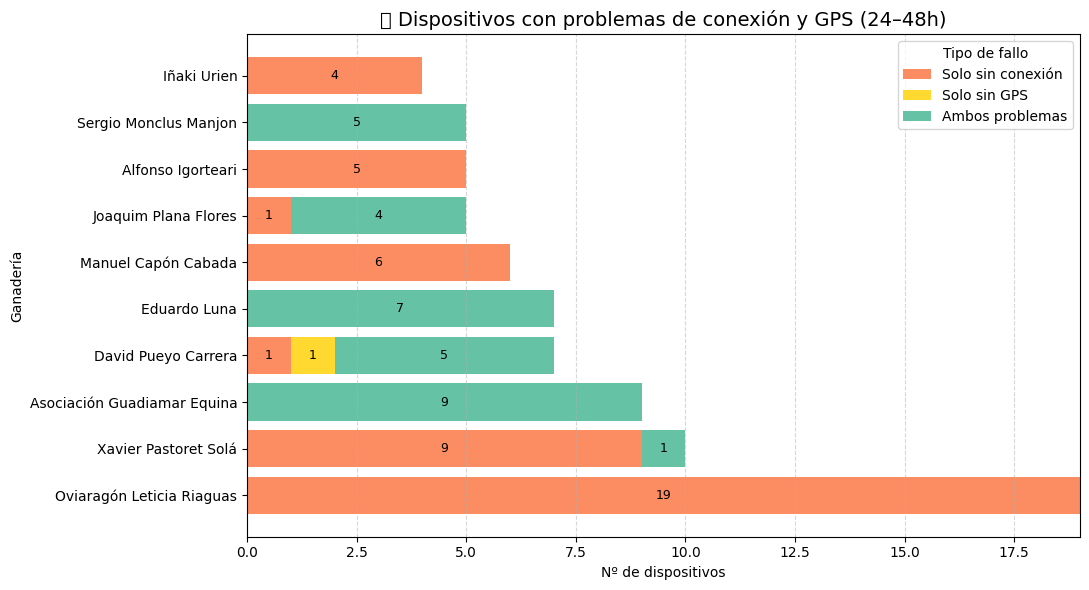

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# === Paso 1: Filtrar por categorías relevantes ===
df_gps = df[df["clasificacion_gps"] == "GPS 24-48h"]
df_conexion = df[df["clasificacion_conexion"] == "Conexión 24-48h"]

# === Paso 2: Agrupar por ganadería ===
gps = df_gps.groupby("ranch_name")["device_id"].nunique().rename("sin_gps")
conex = df_conexion.groupby("ranch_name")["device_id"].nunique().rename("sin_conexion")

# === Paso 3: Dispositivos que están en ambos ===
ambos = pd.Series(
    df_gps[df_gps["device_id"].isin(df_conexion["device_id"])]["ranch_name"]
    .value_counts(),
    name="ambos"
)

# === Paso 4: Unir en una tabla ===
tabla = pd.concat([conex, gps, ambos], axis=1).fillna(0)

# Ajustar categorías para evitar doble conteo
tabla["solo_conexion"] = tabla["sin_conexion"] - tabla["ambos"]
tabla["solo_gps"] = tabla["sin_gps"] - tabla["ambos"]

# Filtrar ganaderías top
tabla["total"] = tabla[["solo_conexion", "solo_gps", "ambos"]].sum(axis=1)
tabla = tabla.sort_values("total", ascending=False).head(10)

# === Paso 5: Gráfico apilado con etiquetas por tramo ===
plt.figure(figsize=(11, 6))

# Barras
b1 = plt.barh(tabla.index, tabla["solo_conexion"], color="#fc8d62", label="Solo sin conexión")
b2 = plt.barh(tabla.index, tabla["solo_gps"], left=tabla["solo_conexion"], color="#ffd92f", label="Solo sin GPS")
b3 = plt.barh(tabla.index, tabla["ambos"], left=tabla["solo_conexion"] + tabla["solo_gps"], color="#66c2a5", label="Ambos problemas")

# Etiquetas en cada tramo
for bars in [b1, b2, b3]:
    for bar in bars:
        width = bar.get_width()
        if width > 0:
            plt.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2,
                     int(width), ha='center', va='center', fontsize=9, color="black")

# Estética
plt.title("📊 Dispositivos con problemas de conexión y GPS (24–48h)", fontsize=14)
plt.xlabel("Nº de dispositivos")
plt.ylabel("Ganadería")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.legend(title="Tipo de fallo", loc="upper right")
plt.tight_layout()
plt.show()


<positron-console-cell-46>:46: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
C:\Users\usuario\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


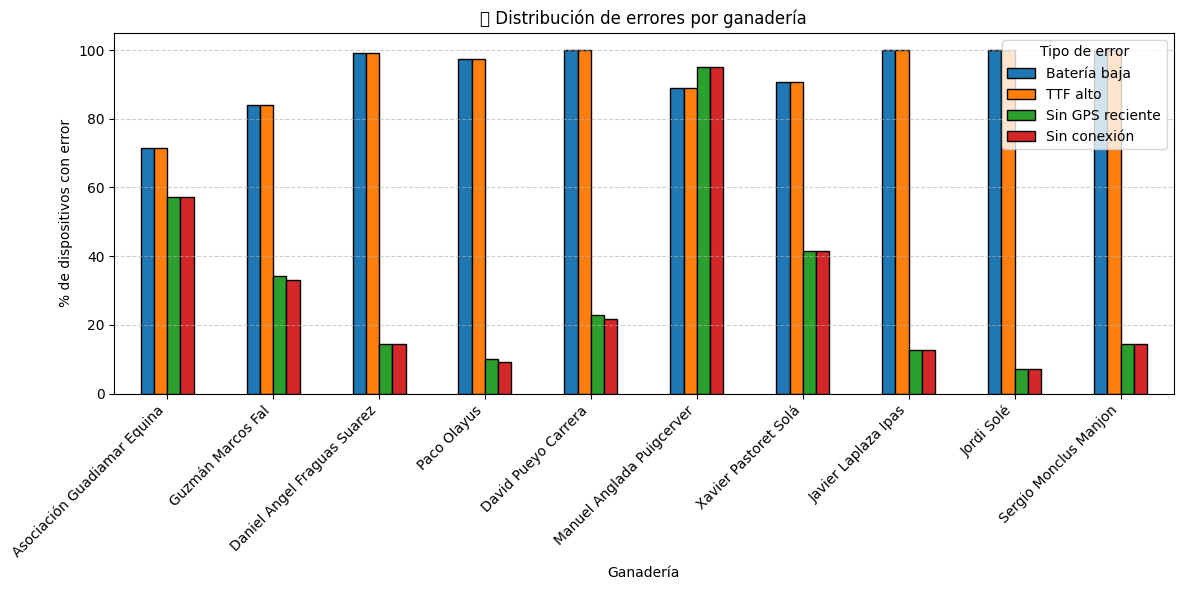

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# === Definir condiciones de error ===
df["error_bateria"] = df["porcentaje_bateria"] < 20
df["error_ttf"] = df["media_ttf"] > 3
df["error_posicion"] = df["clasificacion_gps"].isin([
    "GPS 24-48h", "GPS 48-72h", "GPS 3-7 días", "GPS 7-15 días",
    "GPS 15 días - 1 mes", "GPS 1-3 meses", "GPS >3 meses", "Sin posición GPS válida"
])
df["error_conexion"] = df["clasificacion_conexion"].isin([
    "Conexión 24-48h", "Conexión 48-72h", "Conexión 3-7 días", "Conexión 7-15 días",
    "Conexión 15 días - 1 mes", "Conexión 1-3 meses", "Conexión >3 meses"
])

# === Agrupar por ganadería ===
errores = df.groupby("ranch_name").agg(
    total_dispositivos=("device_id", "nunique"),
    pct_bateria_baja=("error_bateria", "mean"),
    pct_ttf_alto=("error_ttf", "mean"),
    pct_sin_posicion=("error_posicion", "mean"),
    pct_sin_conexion=("error_conexion", "mean")
)

# Convertir a porcentaje
errores_pct = errores.drop(columns="total_dispositivos") * 100
errores_pct = errores_pct.rename(columns={
    "pct_bateria_baja": "Batería baja",
    "pct_ttf_alto": "TTF alto",
    "pct_sin_posicion": "Sin GPS reciente",
    "pct_sin_conexion": "Sin conexión"
})

# Seleccionar las 10 ganaderías con más dispositivos
top_ganaderias = errores.sort_values("total_dispositivos", ascending=False).head(10).index
errores_top = errores_pct.loc[top_ganaderias]

# === Gráfico ===
errores_top.plot(kind="bar", figsize=(12, 6), edgecolor="black")
plt.title("📊 Distribución de errores por ganadería")
plt.ylabel("% de dispositivos con error")
plt.xlabel("Ganadería")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tipo de error")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
